# [Anthropology 115] 2. Exploring HIV and AIDS Data

<br>

**Estimated Time:** 30-45 minutes <br>
**Notebook Developed By:** Reynolds Zhang, Amisha Gupta, Manaar Salama, Lan Dinh <br>

Welcome back! In the previous notebook, we went through a basic introduction of how to use Python and Jupyter Notebooks for this course, as well as doing some introductory exploration and analysis of COVID-19 data while considering the contexts, circumstances, and potential issues of the data collection and representation. In this notebook, we'll continue using Python and Jupyter Notebooks to explore HIV and AIDS data. We will especially focus on what we can learn about our data from the historical context, what we can learn about historical context from our data, and how both of these aspects can complement each other.

<figure>
    <img src="data/hiv_header.jpg" alt="An image" width=600 height=400 />
    </figure>

Image Source: [MedlinePlus](https://medlineplus.gov/hivandinfenctions.html)


### Learning Outcomes

In this notebook, you will learn about:
- The History and Context of HIV and AIDS Data Collection
- Analyzing and Visualizing HIV and AIDS Data with Python
- How to Examine Data and its Context for a Better Understanding of the Situation

### Table of Contents
1. [The History and Context of HIV and AIDS Data Collection](#0) <br>
1. [Introduction to the Data](#1) <br>
1. [Exploring and Manipulating our HIV and AIDS Data](#2) <br>
1. [Visualizing and Understanding Trends in our HIV and AIDS Data](#3) <br>
1. [Submitting Your Work](#4)<br>
1. [Feedback Form](#5)<br>
1. [(Optional) Explore Data Science Opportunities](#6)<br>

As some quick reminders, you will not be expected or required to do any coding yourself in this notebook! The only questions you will be answering are some short-answer questions based on the data and visualizations. These questions that you will be answering are located in the **yellow-shaded boxes** throughout the notebook. Along with this, for any code cells that say "`# Run this cell`" at the top, be sure to run them so you can properly see the data tables and visualizations!

------------------
## Run the cell below to import all our required materials for this notebook!

In [1]:
# Run this cell by hitting 'Shift + Enter' or using the 'Run' button at the top!
import numpy as np
import pandas as pd
from re import sub
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')
import otter
grader = otter.Notebook()
import datascience
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
print("Done!")

Done!


-------------
# 1. The History and Context of HIV and AIDS Data Collection <a id='0'></a>

First, we should give a brief introduction to what HIV and AIDS are, and the history of data collection for HIV and AIDS.

[HIV](https://www.cdc.gov/hiv/basics/whatishiv.html#:~:text=HIV%20(human%20immunodeficiency%20virus)%20is,care%2C%20HIV%20can%20be%20controlled.) stands for **human immunodeficiency virus**. As its name implies, it is a virus that only infects humans, and it can affect people by weakening their immune system, making their bodies less capable of fighting off viruses and bacteria. If a person with HIV does not treat and control it, **it can lead to AIDS, which stands for acquired immunodeficiency syndrome** and is the most severe stage of HIV. Although HIV cannot be completely cured, it is important for people with HIV to have it treated and controlled. HIV can be transmitted from person to person through contact with infected blood and other body fluids.

The first international instances of HIV were seen in the early 1980s (source: [HIV/AIDs Timeline](https://npin.cdc.gov/pages/hiv-and-aids-timeline)). In these early days, they found through research that it could be transmitted through blood. By 1981, they saw the first case of what would become AIDS, or the most severe stage of HIV. By early 1983, the CDC started to discover that most cases of HIV were comprised of gay men and injection drug users. Around 1988-1989, the CDC started releasing public reports and guidelines on the prevention of transmitting HIV.

Around 1996, **highly active antiretroviral therapy (HAART)** was introduced. Up until this point, deaths related to AIDS had been steadily increasing over the years, but after the introduction of this therapy, deaths caused by AIDS finally started to stagnate and then decrease, despite the continued increase in instances of AIDS.

HIV / AIDS is one example in history of a relatively recent virus that experts and governments started tracking and keeping data on early in its beginning. We saw this process most recently with COVID-19 as well. The tracking of this data early on demonstrated how easy and necessary it is for data to be collected on the cases when new viruses or diseases appear.

-----------
# 2. Introduction to the Data <a id='1'></a>

For this notebook, **the first dataset** that we'll be utilizing is from the [United States Census Bureau](https://www.census.gov/data-tools/demo/hiv/#/records?s_datacode=R&menu=dual_grid). This dataset contains AIDS data on cases and deaths, along with demographics of the individuals with AIDS, such as their ages and sexes.

The dataset is large as it contains global information on these cases and deaths from 1979 to 2018. It is an aggregation of data collected by thousands of sources over time and across countries. The data not only comes from different countries but also from hundreds of geographic regions within individual countries, making this dataset massive.

While it's impressive to have data collected from so many sources across countries and over time, it can be challenging to maintain complete consistency and standardization, especially since collecting medical data regarding viruses is a relatively new practice. We'll explore some of the consistency issues in the data in the next section, and it's essential to keep this in mind when examining medical data and data in general.

[**The second dataset**](https://www.unaids.org/sites/default/files/media_asset/UNAIDS_FactSheet_en.pdf) we'll use later on was collected from an HIV and AIDS [fact sheet](https://www.unaids.org/en/resources/fact-sheet) from UNAIDS.org. This data, generated by UNAIDS' own 2021 estimates, presents a breakdown of HIV infections and deaths, as well as people accessing treatment for HIV. We will use this data to examine how the statistics for HIV differ among various regions of the world as recently as 2021.

----------------------
# 3. Exploring and Manipulating our HIV and AIDS Data <a id='2'></a>

As we discussed in the previous section, the **CSV** (comma-separated values file, a type of text file convenient for storing data) that we will be looking at for our HIV and AIDS data comes from the [United States Census Bureau](https://www.census.gov). This dataset is incredible because of how much data it contains, but because of its size and complexity, we will have to do quite a bit of cleaning and manipulation to the data before we can make meaningful visualizations. 

As with Notebook 1, you don't need to understand the how the code works in the following sections. However, we'll be breaking down what we're doing in each section in words so that you can understand the gist of the process we have to go through while cleaning and manipulating data!

In [2]:
# Run this cell
hiv = pd.read_csv("data/hiv_demographics.csv")
hiv.head()

,Sequence,Country Code,Geographic Area,Reference Date,Population Subgroup,Subpop Code,Sex,Age,Source ID,Comments,...,Title,Publication Information,Virus Type,NO_CASES,NO_DEATHS,PREV_RATE,INC_RATE,Specimen Type,Test Type,SAMPSIZE
0,41,ABW,National,2002,Cumulative AIDS cases,O,B,ALL,W0197,Reported as of 21 Oct. 02.,...,"Global Situation of the AIDS Pandemic, End 2002","Weekly Epidemiological Record, December 6, vol...",AIDS,37,0,-1.0,NaN,NaN,NaN,-1
1,90,ABW,National,1996,Cumulative AIDS cases,O,B,ALL,W0114,Reported as of 31 Mar. 96.,...,World Health Organization Global AIDS Statistics,"AIDS, vol. 8, no. 5, pp. 619-623.",AIDS,22,0,-1.0,NaN,NaN,NaN,-1
2,21,ABW,National,1997,Cumulative AIDS cases,O,B,ALL,W0144,Reported as of 15 Apr. 97.,...,UNAIDS/WHO Global AIDS Statistics,"AIDS Care, vol. 11, no. 2, pp. 254-264.",AIDS,24,0,-1.0,NaN,NaN,NaN,-1
3,23,ABW,National,1995,Cumulative AIDS cases & deaths,O,B,ALL,P0163,Reported as of 10 Mar. 96.,...,"Number of Reported Cases of AIDS by Year, and ...","Pan American Health Organization, pp. 1-3.",AIDS,20,16,-1.0,NaN,NaN,NaN,-1
4,24,ABW,National,1996,Cumulative AIDS cases & deaths,O,B,ALL,P0232,Reported as of Apr. 96.,...,Update on HIV/AIDS Surveillance in the Americas,"Epidemiological Bulletin/PAHO, vol. 21, no. 3,...",AIDS,37,17,-1.0,NaN,NaN,NaN,-1


After loading our data in, it's essential to take a look at what types of columns we have in our data.

In [3]:
# Run this cell
hiv.columns

Index(['Sequence', 'Country Code', 'Geographic Area', 'Reference Date',
       'Population Subgroup', 'Subpop Code', 'Sex', 'Age', 'Source ID',
       'Comments', 'Data Type', 'Country', 'Site Name', 'Author', 'Year',
       'Title', 'Publication Information', 'Virus Type', 'NO_CASES',
       'NO_DEATHS', 'PREV_RATE', 'INC_RATE', 'Specimen Type', 'Test Type',
       'SAMPSIZE'],
      dtype='object')

We can do some exploration on these columns to see what type of values and data they hold. Several columns do not actually contain useful values for us to utilize, such as the `Test Type` column. We write the code in the following cell to see what unique values we have in this column, only to find that it contains a single value throughout the whole dataset: `nan`. **`nan` stands for "not a number"**, and it essentially means that the value we are looking at is empty.

In [4]:
# Run this cell
hiv["Test Type"].unique()

array([nan])

In the following cell, we remove all of the columns that do not contain useful information or will not be helpful for us in our analysis.

In [5]:
# Run this cell
hiv = hiv.drop(axis = 1, labels = ["Country Code", "Comments", "Author", "Year", "Specimen Type", "Test Type", "INC_RATE", "SAMPSIZE", "Virus Type", "PREV_RATE"])
hiv.head()

,Sequence,Geographic Area,Reference Date,Population Subgroup,Subpop Code,Sex,Age,Source ID,Data Type,Country,Site Name,Title,Publication Information,NO_CASES,NO_DEATHS
0,41,National,2002,Cumulative AIDS cases,O,B,ALL,W0197,R,Aruba,National,"Global Situation of the AIDS Pandemic, End 2002","Weekly Epidemiological Record, December 6, vol...",37,0
1,90,National,1996,Cumulative AIDS cases,O,B,ALL,W0114,R,Aruba,National,World Health Organization Global AIDS Statistics,"AIDS, vol. 8, no. 5, pp. 619-623.",22,0
2,21,National,1997,Cumulative AIDS cases,O,B,ALL,W0144,R,Aruba,National,UNAIDS/WHO Global AIDS Statistics,"AIDS Care, vol. 11, no. 2, pp. 254-264.",24,0
3,23,National,1995,Cumulative AIDS cases & deaths,O,B,ALL,P0163,R,Aruba,National,"Number of Reported Cases of AIDS by Year, and ...","Pan American Health Organization, pp. 1-3.",20,16
4,24,National,1996,Cumulative AIDS cases & deaths,O,B,ALL,P0232,R,Aruba,National,Update on HIV/AIDS Surveillance in the Americas,"Epidemiological Bulletin/PAHO, vol. 21, no. 3,...",37,17


In addition to columns that contain information that isn't useful to us, we also have some columns, such as the `Age` column, that contain far too many different values to be useful to us. For the purposes of this notebook, we don't need to look at the distinctions between different age groups, so we can just focus on the `ALL` value, which groups up all the different age groups together. However, you can imagine how tedious the process would be to clean up this column if we really did need to look at the different age groups!

In [6]:
# Run this cell
hiv["Age"].unique()

array(['ALL', '10Y14Y', '20Y24Y', '30Y34Y', '60Y+', '01Y04Y', '15Y19Y',
       '35Y39Y', '50Y54Y', '40Y44Y', '45Y49Y', '55Y59Y', '25Y29Y',
       '05Y09Y', '05Y14Y', '00Y04Y', 'UNK', '40Y+', '00Y34Y', '30Y39Y',
       '50Y59Y', '40Y49Y', '00Y14Y', '05Y10Y', '20Y29Y', '01Y05Y', '<01Y',
       '65Y+', '60Y64Y', '15Y+', '<15Y', '13Y19Y', '01Y', '04Y', '02Y',
       '13Y', '05Y', '07Y', '<05Y', '08Y', '14Y+', '10Y', '11Y', '12Y',
       '03Y', '09Y', '06Y', '05Y12Y', '<13Y', '14Y', '13Y+', '60Y69Y',
       '10Y19Y', '50Y+', '49Y+', '70Y+', '00Y09Y', '<25Y', '00Y19Y',
       '20Y39Y', '40Y59Y', '25Y35Y', '36Y45Y', '56Y+', '<16Y', '26Y35Y',
       '46Y55Y', '15Y49Y', '<30Y', '30Y49Y', '<20Y', '15Y39Y', '65Y69Y',
       '<10Y', '16Y25Y', '25Y49Y', '32Y', '<21Y', '70Y74Y', '35Y44Y',
       '25Y34Y', '55Y+', '25Y44Y', '00Y06Y', '51Y+', '31Y40Y', '60Y78Y',
       '18Y40Y', '41Y50Y', '41Y65Y', '07Y17Y', '75Y79Y', '15Y24Y', '<50Y',
       '66Y+', '45Y54Y', '45Y+', '80Y+', '21Y30Y', '<35Y', '35Y+',

For this notebook, we'll look only at the aggregated / grouped up ages and geographic areas, so that we are looking at all ages and a country as a whole.

In [7]:
# Run this cell
hiv = hiv[(hiv["Age"] == "ALL") & (hiv["Geographic Area"] == "National")]

Similarly, the `Reference Date` column contains many different types of values, including individual years as well as ranges of years. To make our analysis and visualizations easier, we will only be looking at individual years, so the following code cells keep only the rows that have singular year values.

In [8]:
# Run this cell
hiv["Reference Date"].unique()[0:40]

array(['2002', '1996', '1997', '1995', '1996-2005', '1991', '1999',
       '1987', '1988', '2001', '1986', '1993', '1994', '1985', '1992',
       '2004', '1989', '2003', '2005', '1982-2005', '2000', '1990',
       '1996-2007', '2011', '2008', '2009', '1979-1985', '1983', '2007',
       '1998', '2010', '2006', '1984', '1982', '1982-2007', '1982-1990',
       '1997-2013', '1988-2007', '1988-2006', '1985-2005'], dtype=object)

In [9]:
# Run this cell
hiv_single_years = hiv[hiv["Reference Date"].str.match("^\d\d\d\d$")]

In [10]:
# Run this cell
hiv_single_years["Reference Date"].unique()

array(['2002', '1996', '1997', '1995', '1991', '1999', '1987', '1988',
       '2001', '1986', '1993', '1994', '1985', '1992', '2004', '1989',
       '2003', '2005', '2000', '1990', '2011', '2008', '2009', '1983',
       '2007', '1998', '2010', '2006', '1984', '1982', '2012', '1981',
       '2013', '1980', '1979', '2014'], dtype=object)

The cell above shows the result of filtering out all of the rows with ranges of years as their `Reference Date` value!

Next, most of the data in this dataset is represented as textual values, or **strings**. We cannot perform numerical analysis on or graph string values very well, so we need to convert some of our string values to numerical values. In the following cells, we break this work of converting to numbers into multiple steps.

In [11]:
# Run this cell
def remove_commas(input):
    if type(input) != str:
        return input
    elif "," in input:
        return sub(",", "", input)
    else:
        return input

In [12]:
# Run this cell
hiv_single_years["NO_CASES"] = hiv_single_years["NO_CASES"].apply(remove_commas)
hiv_single_years["NO_DEATHS"] = hiv_single_years["NO_DEATHS"].apply(remove_commas)

In [13]:
# Run this cell
hiv_single_years = hiv_single_years.astype({"Reference Date": int, "NO_CASES": float, "NO_DEATHS": float})
hiv_single_years.head()

,Sequence,Geographic Area,Reference Date,Population Subgroup,Subpop Code,Sex,Age,Source ID,Data Type,Country,Site Name,Title,Publication Information,NO_CASES,NO_DEATHS
0,41,National,2002,Cumulative AIDS cases,O,B,ALL,W0197,R,Aruba,National,"Global Situation of the AIDS Pandemic, End 2002","Weekly Epidemiological Record, December 6, vol...",37.0,0.0
1,90,National,1996,Cumulative AIDS cases,O,B,ALL,W0114,R,Aruba,National,World Health Organization Global AIDS Statistics,"AIDS, vol. 8, no. 5, pp. 619-623.",22.0,0.0
2,21,National,1997,Cumulative AIDS cases,O,B,ALL,W0144,R,Aruba,National,UNAIDS/WHO Global AIDS Statistics,"AIDS Care, vol. 11, no. 2, pp. 254-264.",24.0,0.0
3,23,National,1995,Cumulative AIDS cases & deaths,O,B,ALL,P0163,R,Aruba,National,"Number of Reported Cases of AIDS by Year, and ...","Pan American Health Organization, pp. 1-3.",20.0,16.0
4,24,National,1996,Cumulative AIDS cases & deaths,O,B,ALL,P0232,R,Aruba,National,Update on HIV/AIDS Surveillance in the Americas,"Epidemiological Bulletin/PAHO, vol. 21, no. 3,...",37.0,17.0


Now, all of the columns that we need represented as numbers, such as `Reference Date`, `NO_CASES`, and `NO_DEATHS`, are ready to be used in quantitative analysis and visualization!

Although you don't need to know how this code worked, we hope this section gave you some insight into what kinds of things we need to initially be looking out for and exploring when working with data. A lot of the time, data will not be ready to visualize upon download, and there are many datasets that are much messier and harder to work with than this one! When working with medical data especially, it is very important to do a lot of initial exploration and research of your data before jumping into analysis.

--------------------
# 4. Visualizing and Understanding Trends in our HIV and AIDS Data  <a id='3'></a>

Now that our data has been cleaned and manipulated for us to use in our analysis and visualization, we can take a closer look at trends we would like to explore across the years and across different demographic groups.

## 4.1 Visualization and Analysis

<!-- BEGIN QUESTION -->
<div class="alert alert-warning">

### Question 4.1:
**Before we begin looking at visualizations of our data, what kind of general trends in cases and deaths do you expect to see over time and across different sexes? You can utilize the information we discussed in Section 1, or you can do your own research / use your own knowledge! You don't need to be too specific or do a lot of research on it -- this question is just meant to reflect your initial intuition.**
</div>

*Type your answer here. Double-click to edit this cell and replace this text with your answer. Run this cell to proceed when finished.*

<!-- END QUESTION -->
<br>
Let's now take a look at the data of cases and deaths over time. We'll look at global data over the years, from 1979 to 2018.

In [14]:
# Run this cell
hiv_grouped_year = hiv_single_years.groupby("Reference Date").agg(sum).reset_index().drop(axis = 1, labels = ["Sequence"])
hiv_grouped_year.head()

,Reference Date,NO_CASES,NO_DEATHS
0,1979,0.0,0.0
1,1980,3.0,1.0
2,1981,2.0,1.0
3,1982,60.0,3.0
4,1983,601.0,6.0


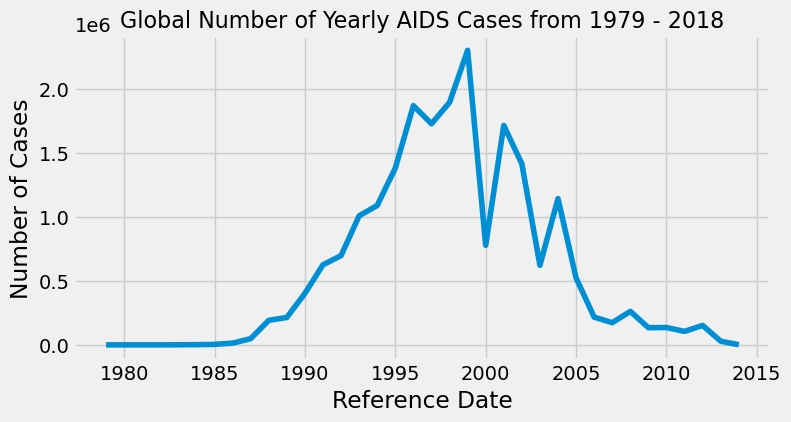

In [18]:
# Run this cell
plt.figure(figsize = (8,4))
sns.lineplot(data = hiv_grouped_year, x = "Reference Date", y = "NO_CASES");
plt.xlabel("Reference Date");
plt.ylabel("Number of Cases");
plt.title("Global Number of Yearly AIDS Cases from 1979 - 2018", fontsize = 16);

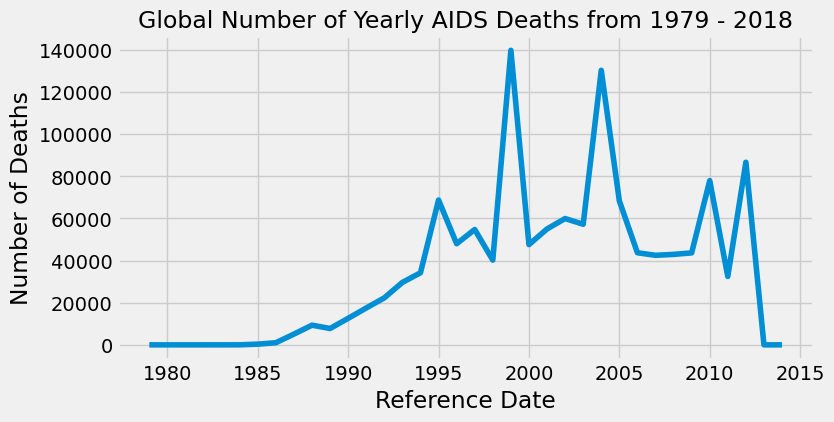

In [19]:
# Run this cell
plt.figure(figsize = (8,4))
sns.lineplot(data = hiv_grouped_year, x = "Reference Date", y = "NO_DEATHS");
plt.xlabel("Reference Date");
plt.ylabel("Number of Deaths");
plt.title("Global Number of Yearly AIDS Deaths from 1979 - 2018", fontsize = 17);

<!-- BEGIN QUESTION -->
<div class="alert alert-warning">

### Question 4.2:
**The graphs above for number of global cases and number of global deaths are a bit different in some periods and quite similar in others. What similarities or differences do you notice between the two graphs? Also, if you have any ideas as to what may have caused these similarities or differences, feel free to discuss them as well.**
</div>

*Type your answer here. Double-click to edit this cell and replace this text with your answer. Run this cell to proceed when finished.*

<!-- END QUESTION -->
<br>
Now, let's take a closer look at the distribution of AIDS cases and deaths across different sexes.

In [26]:
hiv_mf = hiv_single_years[(hiv_single_years["Sex"] == "F") | (hiv_single_years["Sex"] == "M")]
hiv_mf_grouped = hiv_mf.groupby("Sex").agg(sum).reset_index().drop(axis = 1, labels = ["Sequence"])
hiv_mf_grouped.head()

,Sex,Reference Date,NO_CASES,NO_DEATHS
0,F,1540585,779702.0,94905.0
1,M,1778109,1534950.0,257330.0


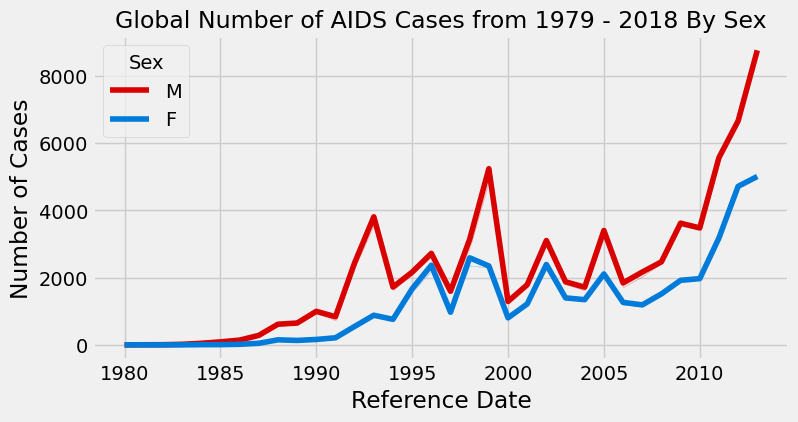

In [27]:
# Run this cell
colors = {"F": "#007bd9", "M": "#d90000"}
plt.figure(figsize = (8,4))
sns.lineplot(data = hiv_mf, x = "Reference Date", y = "NO_CASES", hue = "Sex", ci = False, palette = colors);
plt.xlabel("Reference Date");
plt.ylabel("Number of Cases");
plt.title("Global Number of AIDS Cases from 1979 - 2018 By Sex", fontsize = 17);

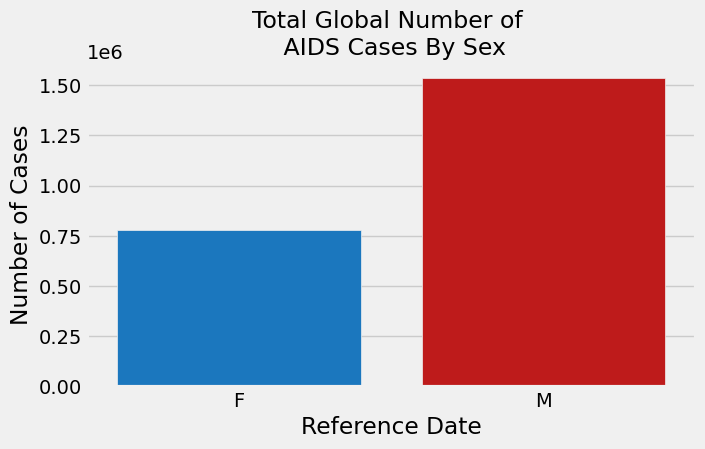

In [28]:
# Run this cell
plt.figure(figsize = (7,4))
sns.barplot(data = hiv_mf_grouped, x = "Sex", y = "NO_CASES", ci = False, palette = colors);
plt.xlabel("Reference Date");
plt.ylabel("Number of Cases");
plt.title("Total Global Number of \n AIDS Cases By Sex", fontsize = 17);

As we could have assumed, the number of AIDS cases for males in this dataset is far greater than that of females.

<!-- BEGIN QUESTION -->
<div class="alert alert-warning">

### Question 4.3:
**What kind of trends of AIDS cases or deaths might you expect to find or be interested in taking a look at if we had more data available in this dataset? This question is meant to be more open-ended -- there is no right or wrong answer.**
</div>

*Type your answer here. Double-click to edit this cell and replace this text with your answer. Run this cell to proceed when finished.*

<!-- END QUESTION -->
<br>
Holistically, this data shows us that around the world, the number of AIDS cases and deaths are lower than they used to be. However, this absolutely does not mean that the danger from AIDS is gone and that it is practically nonexistent today. Let's take a closer look at specific countries / regions to see how many people are still affected by AIDS today.

First, let's try taking a look at South Africa using this data as an example of how AIDS in a country in the African continent looks today.

In [29]:
# Run this cell
hiv_sa = hiv_single_years[hiv_single_years["Country"] == "South Africa"].groupby("Reference Date").agg(sum).reset_index().drop(axis = 1, labels = ["Sequence"])
hiv_sa

,Reference Date,NO_CASES,NO_DEATHS
0,1982,2.0,2.0
1,1983,4.0,3.0
2,1984,8.0,8.0
3,1985,17.0,18.0
4,1986,24.0,23.0
5,1987,353.0,86.0
6,1988,1274.0,162.0
7,1989,1803.0,96.0
8,1990,2313.0,82.0
9,1991,2087.0,74.0


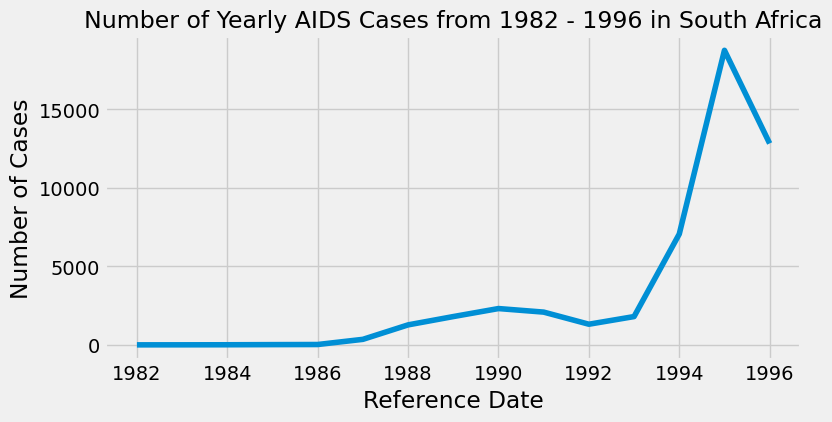

In [31]:
# Run this cell
plt.figure(figsize = (8,4))
sns.lineplot(data = hiv_sa, x = "Reference Date", y = "NO_CASES");
plt.xlabel("Reference Date");
plt.ylabel("Number of Cases");
plt.title("Number of Yearly AIDS Cases from 1982 - 1996 in South Africa", fontsize = 17);

Unfortunately, this data is not the most helpful -- it only provides numbers from 1982 - 1996, which doesn't give us a clear idea of how AIDS looks there today. Many of the countries in Africa look this way in the dataset: only a period of years contains data. To combat this issue, we'll have to utilize a second dataset.

In [32]:
# Run this cell
hiv_region = pd.read_csv("data/hiv_region.csv")
hiv_region

,Region,People living with HIV 2021,New HIV infections 2021 - Total,New HIV infections 2021 - Aged 15+ years,New HIV infections 2021 - Aged 0-14 years,AIDS-related deaths 2021,People accessing treatment 2021
0,Eastern and southern Africa,20600000,670000,590000,78000,280000,16200000
1,Asia and the Pacific,6000000,260000,250000,14000,140000,4000000
2,Western and central Africa,5000000,190000,140000,54000,140000,3900000
3,Latin America,2200000,110000,100000,4000,29000,1500000
4,The Caribbean,330000,14000,13000,910,5700,230000
5,Middle East and North Africa,180000,14000,12000,1500,5100,88000
6,Eastern Europe and central Asia,1800000,160000,160000,0,44000,930000
7,Western and central Europe and North America,2300000,63000,63000,0,13000,1900000
8,Global totals,38400000,1500000,1300000,160000,650000,28700000


With this dataset, we have recent information on HIV (not AIDS, as in the previous dataset) from the year 2021. Let's look at a breakdown of HIV across these regions.

In [33]:
# Run this cell
hiv_region_indiv = hiv_region.drop(8)

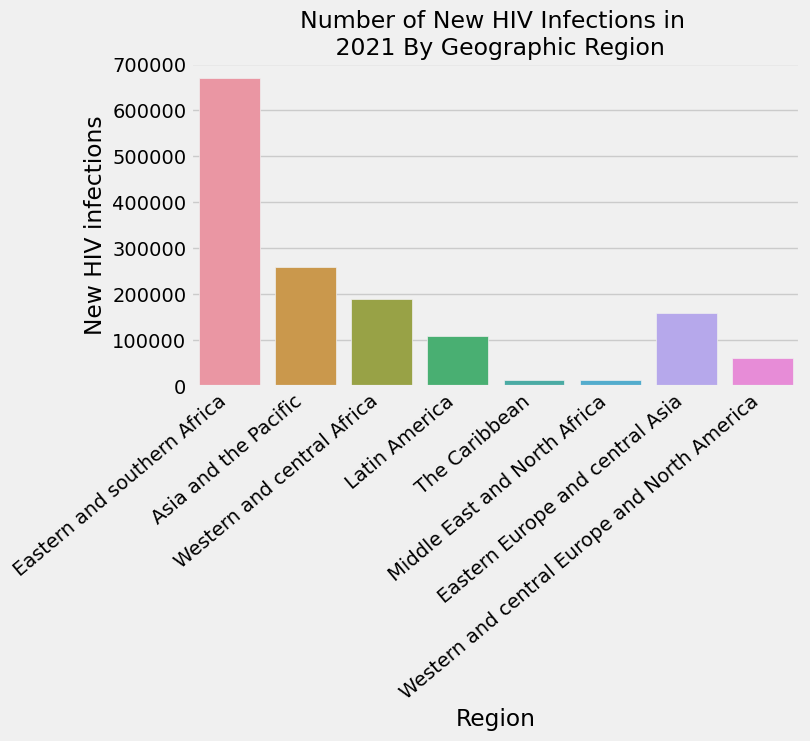

In [34]:
# Run this cell
plt.figure(figsize = (7,4))
plot = sns.barplot(data = hiv_region_indiv, x = "Region", y = "New HIV infections 2021 - Total", ci = False);
plot.set_xticklabels(plot.get_xticklabels(), rotation = 40, ha = "right");
plt.xlabel("Region");
plt.ylabel("New HIV infections");
plt.title("Number of New HIV Infections in \n 2021 By Geographic Region", fontsize = 17);

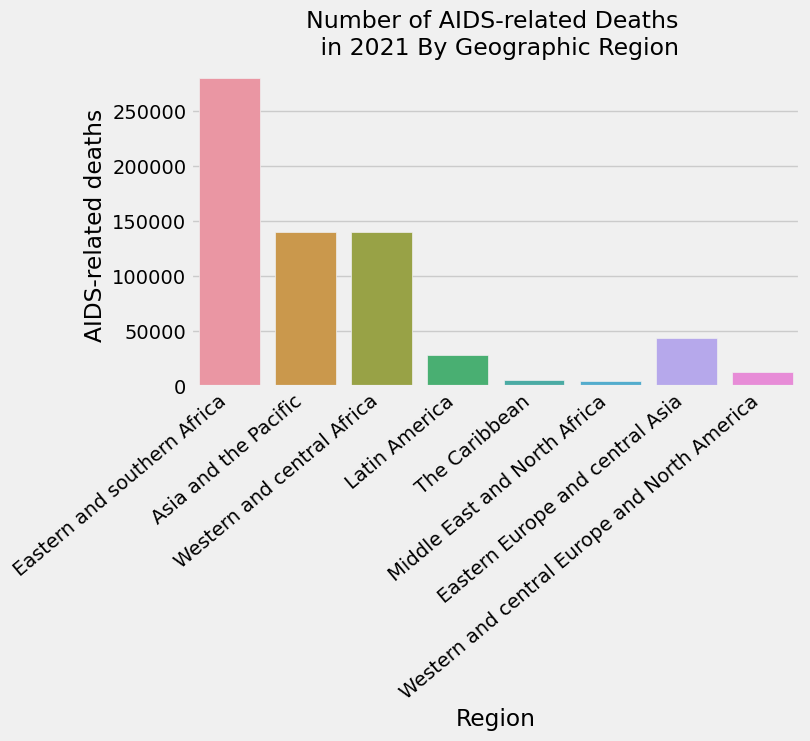

In [35]:
# Run this cell
plt.figure(figsize = (7,4))
plot = sns.barplot(data = hiv_region_indiv, x = "Region", y = "AIDS-related deaths 2021", ci = False);
plot.set_xticklabels(plot.get_xticklabels(), rotation = 40, ha = "right");
plt.xlabel("Region");
plt.ylabel("AIDS-related deaths");
plt.title("Number of AIDS-related Deaths \n in 2021 By Geographic Region", fontsize = 17);

These graphs tell a different story than the graphs and dataset we saw previously. We could see from our first graphs that, globally, in recent years the number of AIDS cases and deaths is much lower than the numbers of cases and deaths from the 1980s and 1990s, when there was not as much knowledge and no treatment available for HIV and AIDS.

Because of this discrepancy, the graphs seemed as though HIV and AIDS is practically non-existent today, especially for many countries in Africa, since their data has not been fully updated from the first dataset that we utilized. However, these two graphs show us just how prevalent HIV and AIDS still is around the world, particularly in Africa. This is one of the reasons that it is important to not take a single dataset at face value without looking deeper into it, and with medical data, it can be very important to consider more than one dataset when looking at a certain phenomenon.

## 4.2 Examining the Economic Impact

Looking at some visualizations and tables filled with numbers that are supposed to represent infections and deaths of people in the world can give us somewhat of a sense of how serious the impact of HIV and AIDS has been and continues to be, but it is not enough. Viewing people's lives as a simple number leaves a lot of the true impact out of the picture.

To explore this problem from another angle, let's examine the economic burden of combating HIV and AIDS over time. In this section, you will mostly engage in self-directed exploration of [a chapter](https://www.imf.org/external/pubs/ft/aids/eng/chapter2.pdf) from the book *The Macroeconomics of HIV/AIDS*. The chapter focuses on the economic situation in countries affected by HIV and AIDS, primarily in developing nations.



The chapter is quite lengthy, and we don't expect you to read it thoroughly. Instead, skim through it, paying special attention to sections, data, or visualizations that you find most intriguing or surprising.

<!-- BEGIN QUESTION -->
<div class="alert alert-warning">

### Question 4.4:
**In a few sentences, discuss what you found most interesting, surprising, or concerning in the chapter. You can mention any data tables with unexpected figures, visualizations that captured your interest, or statements that provided deeper insight into the economic burden these countries faced due to HIV/AIDS.**
</div>

*Type your answer here. Double-click to edit this cell and replace this text with your answer. Run this cell to proceed when finished.*

<!-- END QUESTION -->
-------------------------
# Congratulations! You Have Completed Notebook 2.

We hope this notebook gave you a fun and interesting look into different data analysis and visualization techniques for exploring HIV and AIDS data. In the final two notebooks, we'll be exploring and asking questions about other medical data. Below, you will find instructions on how to generate a PDF of your written responses to submit!

---------------
# 5. Submitting Your Work  <a id='4'></a>

**Make sure that you've answered all the questions.**

Follow these steps: 
1. Go to `File` in the menu bar, then select `Save and Checkpoint` (or press CTRL+S on the keyboard).
2. Go to `Cell` in the menu bar, then select `Run All`.
3. Click the link produced by the code cell below.
4. Submit the downloaded PDF on bCourses according to your professor's instructions.

**Note:** If clicking the link below doesn't work for you, don't worry! Simply click `File` in the menu, find `Download As`, and choose `PDF via LaTeX (.pdf)` to save a copy of your PDF onto your computer. Alternatively, you can also right click the link and save the link content as a PDF.

**Check the PDF before submitting and make sure all of your answers and any changes are shown.**

In [36]:
# Run this cell
# This may take a few extra seconds.
from otter.export import export_notebook
from IPython.display import display, HTML
export_notebook("Notebook 2.ipynb", filtering=True, pagebreaks=False)
display(HTML("<p style='font-size:20px'> <br>Save this notebook, then click <a href='Notebook 2.pdf' download>here</a> to open the PDF.<br></p>"))

----------------------
# 6. Feedback Form <a id='5'></a>

<div class="alert alert-info">
<b> We encourage student to fill out the following feedback form to share your experience with this Module notebook. This feedback form will take no longer than 5 minutes. At UC Berkeley Data Science Undergraduate Studies Modules, we appreciate all feedback to improve the learning of students and experience utilizing Jupyter Notebooks for Data Science Education: </b> 
</div>

# [UC Berkeley Data Science Feedback Form](https://forms.gle/hPgYMxFWKXH2sVkd7)

------------------
# 7. (Optional) Explore Data Science Opportunities  <a id='6'></a>

Interested in learning more about how to get involved in data science or coding for data analysis? The following resources might help support your learning:


- Data Science Modules: http://data.berkeley.edu/education/modules

- Data Science Offerings at Berkeley: https://data.berkeley.edu/academics/undergraduate-programs/data-science-offerings

- Data 8 Course Information: http://data8.org/

- Data 100 Course Information: https://ds100.org/